# Computational Assignment 1

### TFY4345 Classical Mechanics

**Håkon Kvitvik Eckle**

In [151]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
# Constants

theta = np.radians(45) # Radians to fit with np.sin() and np.cos()
v0 = 700               # [m/s]
B2m = 4E-5             # B_2/m [1/m]
kBTmg = 1E4            # k_BT/mg [m]
a = 6.5E-3             # [K/m]
alpha = 2.5
g = 9.81               # [m/s^2]
T0 = 288               # Approximate sea level temperature in Kelvin

### Task 1: Projectile motion with air resistance

**Without any drag:**

We were to use the Runge-Kutta algorithm of 4th order (*RK4* from now) to simulate different projectile motions with air resistance. To start, I implement the RK4 and test it on the projectile motion without any air resistance, so that I can compare it to the analytical solution.  

I start by implementing the function *RK4*, which uses the RK4 algorithm to solve an ODE. I get the intitial conditions from the function *init*, and use them to solve the ODE in *RK4*. At the end of the function I set the final x-value to be the landing point $$x_l = \frac{x_n + rx_{n+1}}{r+1},$$ where $$r = -\frac{y_n}{y_{n+1}}.$$ I then set the final y-value to be $0$ since it doesn't make any sense with negative values of y here and I want to know when it hits the ground ($y=0$).

In [153]:
def F_no(y): # calculate derivative, y = [x,v_x,y,v_y]
    
    der = np.zeros(4) # der = [x',v_x',y',v_y']
    
    der[0] = y[1]
    der[1] = 0
    der[2] = y[3]
    der[3] = -g
    
    return der

def init(v0,theta): # Create list with initial values
    vx = v0*np.cos(theta) # v_x
    vy = v0*np.sin(theta) # v_y
    
    y = np.zeros(4)
    y[1] = vx
    y[3] = vy
    return y # Initial value [0,v_x,0,v_y] (start from x=y=0 with speed v=(v_x,v_y))

In [154]:
def RK4(dt,F,theta,v0):    
    vec = [init(v0,theta)] # Create an initital vector with the initial values
    i = 0
    while ((vec[-1][2] >= 0) and i<1000000): # Run until height (y) is <0
        K1 = F(vec[i])
        K2 = F(vec[i] + dt/2)
        K3 = F(vec[i] + dt/2)
        K4 = F(vec[i] + dt)
        
        vec.append(vec[i] + dt/6 * (K1 + 2*K2 + 2*K3 + K4)) # RK4
        
        i += 1
    
    time = i*dt # Number of steps times the timestep gives total time
    
    vec[-1][0] = (vec[-2][0] + (-vec[-2][2] / vec[-1][2])*vec[-1][0]) / ((-vec[-2][2] / vec[-1][2]) + 1) # Landing point x-value
    vec[-1][2] = 0 # Landing point y-value
    
    return np.array(vec),time

The analytical solution to the motion without any air resistance is $$ x(t) = v_xt $$ $$ y(t) = v_yt - \tfrac{1}{2}gt^2 $$ Notice $ t \in [0,\frac{2v_y}{g}] $.

Below I implemented the analytic solution using the formulas above.

In [155]:
def analytic(dt,vx,vy):
    t = np.arange(0,2*vy/g,dt)
    x = vx*t
    y = vy*t - 1/2 * g * (t**2)
    
    return x,y

To compare the numerical solution with the analytical I plot the analytical solution along with the numerical for some different timesteps $\Delta t$.

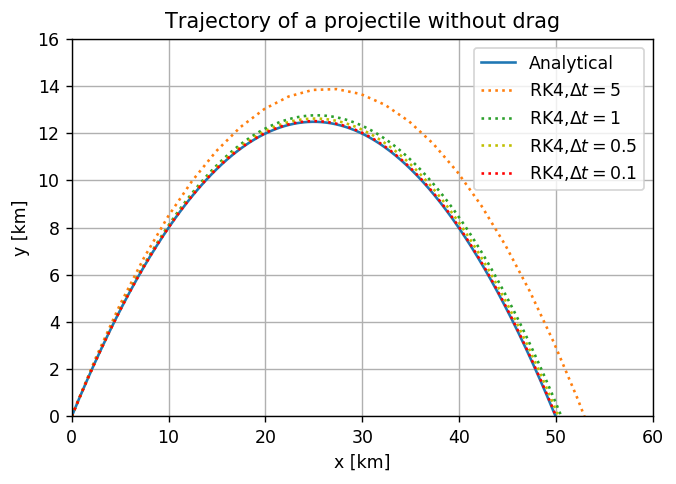

In [156]:
x,y = analytic(0.01,v0*np.cos(theta),v0*np.sin(theta))

plt.figure(dpi=125)
plt.title('Trajectory of a projectile without drag')
plt.plot(x/1000,y/1000,label='Analytical')
plt.plot(RK4(5,F_no,theta,v0)[0][:,0]/1000,RK4(5,F_no,theta,v0)[0][:,2]/1000,':',label=f'RK4,$\Delta t=5$')
plt.plot(RK4(1,F_no,theta,v0)[0][:,0]/1000,RK4(1,F_no,theta,v0)[0][:,2]/1000,':',label=f'RK4,$\Delta t=1$')
plt.plot(RK4(0.5,F_no,theta,v0)[0][:,0]/1000,RK4(0.5,F_no,theta,v0)[0][:,2]/1000,':',color='y',label=f'RK4,$\Delta t=0.5$')
plt.plot(RK4(0.1,F_no,theta,v0)[0][:,0]/1000,RK4(0.1,F_no,theta,v0)[0][:,2]/1000,':',color='r',label=f'RK4,$\Delta t=0.1$')
plt.xlabel('x [km]')
plt.xlim([0,60])
plt.ylabel('y [km]')
plt.ylim([0,16])
plt.grid()
plt.legend()
plt.show()

From the plot we can see that the RK4-solutions converge towards the analytical solution for small timesteps, as expected and wanted.

To decide which value for $\Delta t$ to use in the next tasks, I decided to plot the difference between the calculated endpointvalue and the analytical endpoint for different timesteps.

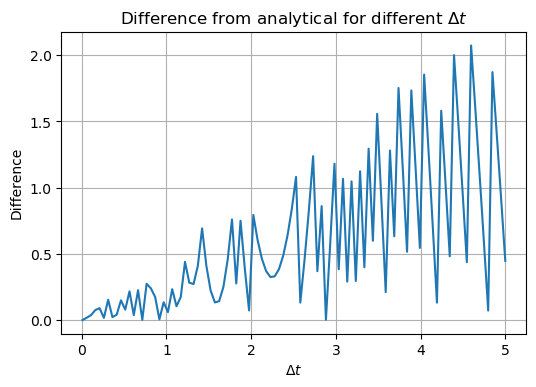

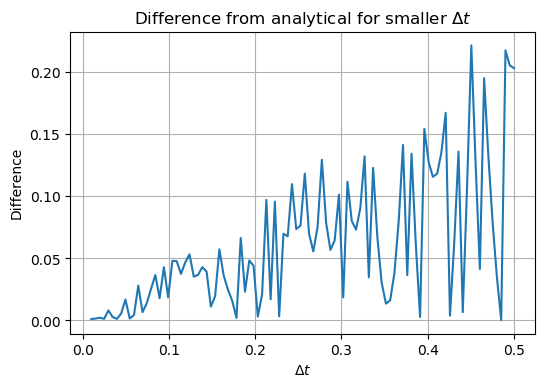

In [157]:
dts = np.linspace(0.01,5,100) # Values of dt to test difference from analytical
diff = []
for i in range(len(dts)): # Calculate difference for each timestep
    diff.append((analytic(dts[i],v0*np.cos(theta),v0*np.sin(theta))[1][-1] - RK4(dts[i],F_no,theta,v0)[0][:,2][-1])/1000)

plt.figure(dpi=100)
plt.title(f"Difference from analytical for different $\Delta t$")
plt.plot(dts,diff)
plt.xlabel(f"$\Delta t$")
plt.ylabel("Difference")
plt.grid()
plt.show()

dts2 = np.linspace(0.01,0.5,100) # Values of smaller dt to test difference from analytical
diff2 = []
for i in range(len(dts2)): # Calculate difference for each timestep
    diff2.append((analytic(dts2[i],v0*np.cos(theta),v0*np.sin(theta))[1][-1] - RK4(dts2[i],F_no,theta,v0)[0][:,2][-1])/1000)

plt.figure(dpi=100)
plt.title(f"Difference from analytical for smaller $\Delta t$")
plt.plot(dts2,diff2)
plt.xlabel(f"$\Delta t$")
plt.ylabel("Difference")
plt.grid()
plt.show()

From the first plot we see that the difference from the analytical value is relatively big for the bigger timesteps. Thus, I decided to plot the difference for small values. Here we can see that $\Delta t = 0.1$ gives small difference from the analytical value, and thus I choose this as my timestep.

In [158]:
dt = 0.1 # Timestep

**Air drag, no air density corrections:**

Now we want to simulate the projectile motion for different situations with air resistance. First, we use an air resitace model without any air density corrections. This gives us only the addition of the force $$F_{drag} = -B_2v^2.$$

In [159]:
def F_no_density(y):
    der = np.zeros(4) # der = [x',vx',y',vy']
    
    v = np.sqrt(y[1]**2 + y[3]**2)
    
    der[0] = y[1]
    der[1] = - B2m*v*y[1]
    der[2] = y[3]
    der[3] = -g - B2m*v*y[3]
    
    return der

The optimal firing angle $\theta$ can be different from $45$ degrees when air resistance is involved. Thus, we are interested in calculating the optimal angle for maximum range. 

Optimal value for angle = 39


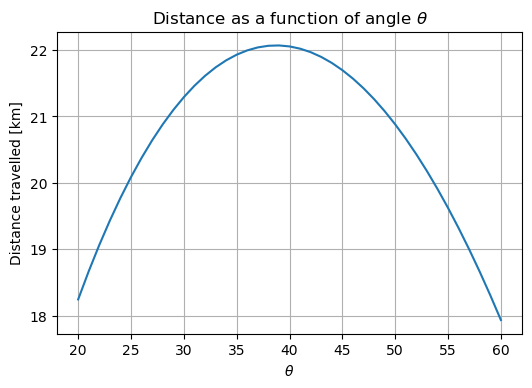

In [160]:
thetas = np.arange(20,61,1) # List of theta-values
length = []
maxy = 0
for i in range(len(thetas)): # Finding the optimal theta and making a list to plot the distances as a funtion of theta
    length.append(RK4(dt,F_no_density,np.radians(thetas[i]),v0)[0][:,0][-1]/1000)
    if length[i] > length[maxy]:
        maxy = i
print(f'Optimal value for angle = {thetas[maxy]}')
        
plt.figure(dpi=100)
plt.title(r'Distance as a function of angle $\theta$')
plt.plot(thetas,length)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('Distance travelled [km]')
plt.show()

We see that the calculated optimal value for the angle $\theta$ is $39$ degrees, and to show the trajectories for different angles I plot for five different angles.

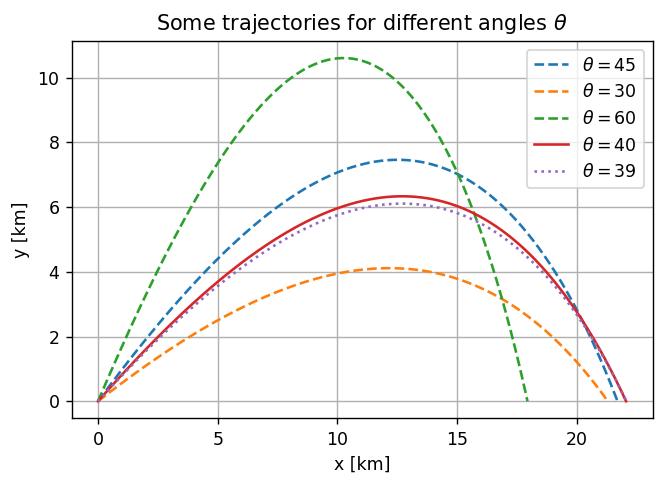

In [161]:
plt.figure(dpi=125)
plt.title(r'Some trajectories for different angles $\theta$')
plt.plot(RK4(dt,F_no_density,theta,v0)[0][:,0]/1000,RK4(dt,F_no_density,theta,v0)[0][:,2]/1000,'--',label=r'$\theta=45$')
plt.plot(RK4(dt,F_no_density,np.radians(30),v0)[0][:,0]/1000,RK4(dt,F_no_density,np.radians(30),v0)[0][:,2]/1000,'--',label=r'$\theta=30$')
plt.plot(RK4(dt,F_no_density,np.radians(60),v0)[0][:,0]/1000,RK4(dt,F_no_density,np.radians(60),v0)[0][:,2]/1000,'--',label=r'$\theta=60$')
plt.plot(RK4(dt,F_no_density,np.radians(40),v0)[0][:,0]/1000,RK4(dt,F_no_density,np.radians(40),v0)[0][:,2]/1000,label=r'$\theta=40$')
plt.plot(RK4(dt,F_no_density,np.radians(39),v0)[0][:,0]/1000,RK4(dt,F_no_density,np.radians(39),v0)[0][:,2]/1000,':',label=r'$\theta=39$')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.grid()
plt.legend()
plt.show()

The results from this corresponds nicely with the last plot. Notice that $\theta = 40$ and $\theta = 39$ degrees will give approximately the same result.

**Isothermic density model:**

Now we want to test with another air drag model, the isothermic density model. For this we need to multiply $F_{drag}$ from above with a density-term, which gives us the total drag-force $$ F_{drag}^{*} = \frac{\rho}{\rho_0} F_{drag}, $$ where $$\rho = \rho_0 exp(-\tfrac{y}{y_0})$$ in the isothermic density model. This gives us the functions below.

In [162]:
def F_isothermic(y):
    der = np.zeros(4) # der = [x',vx',y',vy']
    
    v = np.sqrt(y[1]**2 + y[3]**2)
    rho = np.exp(- y[2]/kBTmg)
    
    der[0] = y[1]
    der[1] = - rho*B2m*v*y[1]
    der[2] = y[3]
    der[3] = -g - rho*B2m*v*y[3]
    
    return der

Optimal value for angle = 46


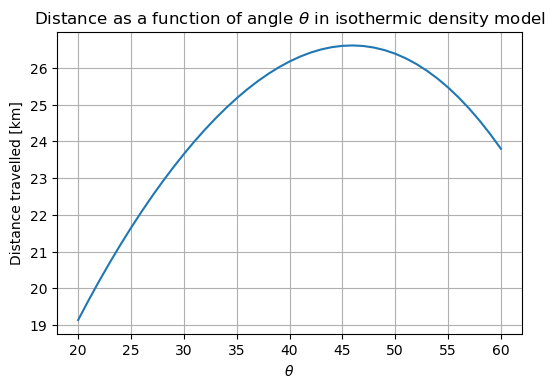

In [163]:
iso = []
maxyi = 0
for i in range(len(thetas)):
    iso.append(RK4(dt,F_isothermic,np.radians(thetas[i]),v0)[0][:,0][-1]/1000)
    if iso[i] > iso[maxyi]:
        maxyi = i
print(f'Optimal value for angle = {thetas[maxyi]}')
    
plt.figure(dpi=100)
plt.title(r'Distance as a function of angle $\theta$ in isothermic density model')
plt.plot(thetas,iso)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('Distance travelled [km]')
plt.show()

In this air drag model we calculate the optimal angle $\theta$ to be $46$ degrees. Again I plot the trajectories for different angles.

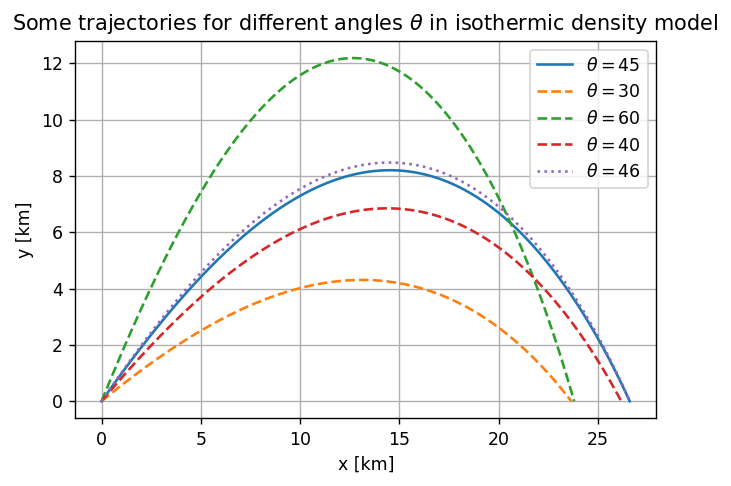

In [164]:
plt.figure(dpi=125)
plt.title(r'Some trajectories for different angles $\theta$ in isothermic density model')
plt.plot(RK4(dt,F_isothermic,theta,v0)[0][:,0]/1000,RK4(dt,F_isothermic,theta,v0)[0][:,2]/1000,label=r'$\theta=45$')
plt.plot(RK4(dt,F_isothermic,np.radians(30),v0)[0][:,0]/1000,RK4(dt,F_isothermic,np.radians(30),v0)[0][:,2]/1000,'--',label=r'$\theta=30$')
plt.plot(RK4(dt,F_isothermic,np.radians(60),v0)[0][:,0]/1000,RK4(dt,F_isothermic,np.radians(60),v0)[0][:,2]/1000,'--',label=r'$\theta=60$')
plt.plot(RK4(dt,F_isothermic,np.radians(40),v0)[0][:,0]/1000,RK4(dt,F_isothermic,np.radians(40),v0)[0][:,2]/1000,'--',label=r'$\theta=40$')
plt.plot(RK4(dt,F_isothermic,np.radians(46),v0)[0][:,0]/1000,RK4(dt,F_isothermic,np.radians(46),v0)[0][:,2]/1000,':',label=r'$\theta=46$')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.grid()
plt.legend()
plt.show()

Notice that the difference between the distance travelled for $\theta = 45$ and $\theta = 46$ degrees is negligible.

**Adiabatic density model:**

The last model we want to test is the adiabatic density model. For this model we use $$\rho = \rho_0 (1 + \tfrac{ay}{T_0})^\alpha.$$ This gives us the functions below.

In [165]:
def F_adiabatic(y):
    der = np.zeros(4) # der = [x',vx',y',vy']
    
    v = np.sqrt(y[1]**2 + y[3]**2)
    rho = (1 - a*y[2]/T0)**alpha
    
    der[0] = y[1]
    der[1] = - rho*B2m*v*y[1]
    der[2] = y[3]
    der[3] = -g - rho*B2m*v*y[3]
    
    return der

Optimal value for angle = 44


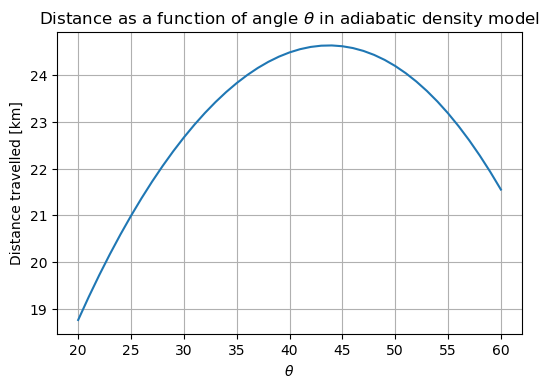

In [166]:
ada = []
maxya = 0
for i in range(len(thetas)):
    ada.append(RK4(dt,F_adiabatic,np.radians(thetas[i]),v0)[0][:,0][-1]/1000)
    if ada[i] > ada[maxya]:
        maxya = i
print(f'Optimal value for angle = {thetas[maxya]}')
    
plt.figure(dpi=100)
plt.title(r'Distance as a function of angle $\theta$ in adiabatic density model')
plt.plot(thetas,ada)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('Distance travelled [km]')
plt.show()

The calculated value for the optimal $\theta$ is $44$ degrees for the adiabatic density model.

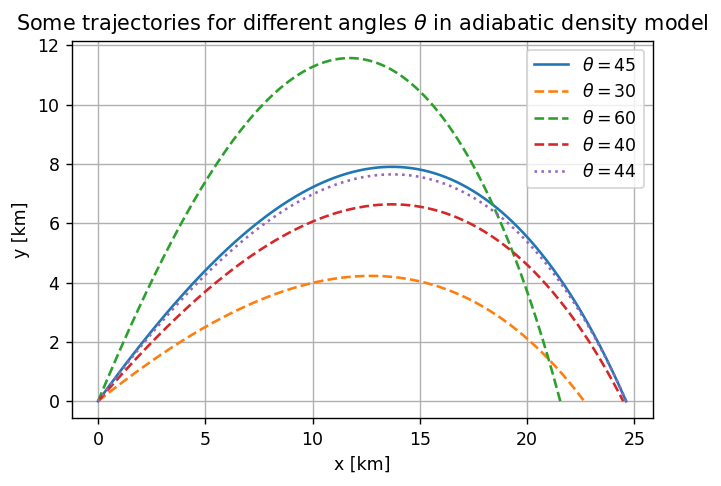

In [167]:
plt.figure(dpi=125)
plt.title(r'Some trajectories for different angles $\theta$ in adiabatic density model')
plt.plot(RK4(dt,F_adiabatic,theta,v0)[0][:,0]/1000,RK4(dt,F_adiabatic,theta,v0)[0][:,2]/1000,label=r'$\theta=45$')
plt.plot(RK4(dt,F_adiabatic,np.radians(30),v0)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(30),v0)[0][:,2]/1000,'--',label=r'$\theta=30$')
plt.plot(RK4(dt,F_adiabatic,np.radians(60),v0)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(60),v0)[0][:,2]/1000,'--',label=r'$\theta=60$')
plt.plot(RK4(dt,F_adiabatic,np.radians(40),v0)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(40),v0)[0][:,2]/1000,'--',label=r'$\theta=40$')
plt.plot(RK4(dt,F_adiabatic,np.radians(44),v0)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(44),v0)[0][:,2]/1000,':',label=r'$\theta=44$')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.grid()
plt.legend()
plt.show()

The difference between $\theta = 44$ and $\theta = 45$ degrees is negligible, as we can see from the plot above.

### Task 2: The Paris gun

The Paris gun had a muzzle velocity of $$v_0 = 1640 \tfrac{m}{s}.$$ In this task we use the adiabatic density model from above, and we assume the same value for $\tfrac{B_2}{m}$ as earlier. This means that the only difference from above is the muzzle velocity. But this can give us another optimal firing angle $\theta$, so we calculate this again with the new muzzle velocity.

Optimal value for angle = 56


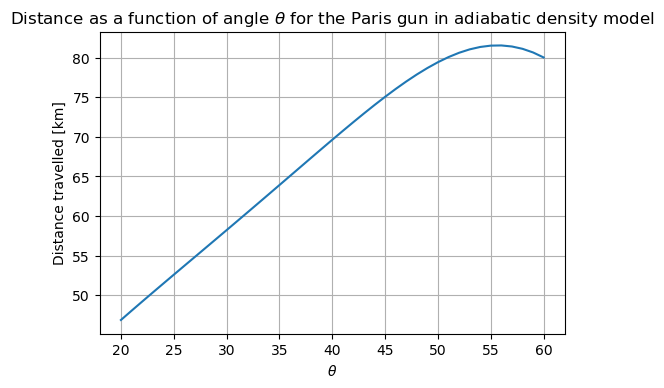

In [168]:
paris = []
maxparis = 0
for i in range(len(thetas)):
    paris.append(RK4(dt,F_adiabatic,np.radians(thetas[i]),1640)[0][:,0][-1]/1000)
    if paris[i] > paris[maxparis]:
        maxparis = i
print(f'Optimal value for angle = {thetas[maxparis]}')
    
plt.figure(dpi=100)
plt.title(r'Distance as a function of angle $\theta$ for the Paris gun in adiabatic density model')
plt.plot(thetas,paris)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('Distance travelled [km]')
plt.show()

We see from above that the optimal angle is very different from the value previous found for the smaller muzzle velocity. 

Range: 81.52109656913376km
Flight time: 168.5s


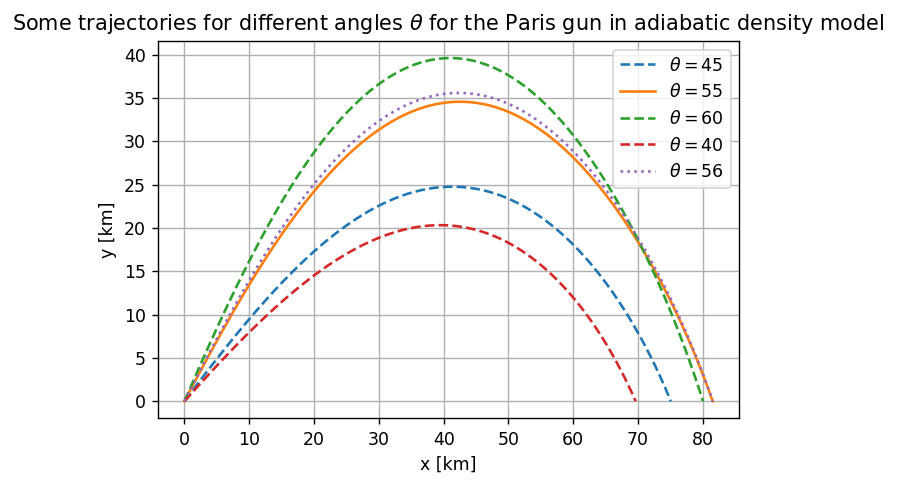

In [169]:
print(f'Range: {RK4(dt,F_adiabatic,np.radians(55),1640)[0][:,0][-1]/1000}km')
print(f'Flight time: {RK4(dt,F_adiabatic,np.radians(55),1640)[1]}s')

plt.figure(dpi=125)
plt.title(r'Some trajectories for different angles $\theta$ for the Paris gun in adiabatic density model')
plt.plot(RK4(dt,F_adiabatic,theta,1640)[0][:,0]/1000,RK4(dt,F_adiabatic,theta,1640)[0][:,2]/1000,'--',label=r'$\theta=45$')
plt.plot(RK4(dt,F_adiabatic,np.radians(55),1640)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(55),1640)[0][:,2]/1000,label=r'$\theta=55$')
plt.plot(RK4(dt,F_adiabatic,np.radians(60),1640)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(60),1640)[0][:,2]/1000,'--',label=r'$\theta=60$')
plt.plot(RK4(dt,F_adiabatic,np.radians(40),1640)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(40),1640)[0][:,2]/1000,'--',label=r'$\theta=40$')
plt.plot(RK4(dt,F_adiabatic,np.radians(56),1640)[0][:,0]/1000,RK4(dt,F_adiabatic,np.radians(56),1640)[0][:,2]/1000,':',label=r'$\theta=56$')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.grid()
plt.legend()
plt.show()

We see that an angle of $\theta = 55$ degrees, as it's approximately the same as for $\theta = 56$ degrees, gives the best range. From the calculations above we can see that the range for the Paris gun is just above $80$km, with a maximum height of almost $35$km. According to [Britannica](https://www.britannica.com/technology/Paris-Gun) the shells from the Paris gun attained a distance of approximately $120$km. Some of the reasons for the huge difference between our simulation and the real range are the assumptions we made. We used the adiabatic density model, which is best for height below $10$km. This means that we might have done the calculations with to high air density for most of the trajectory, as we see from above that most of the trajectory is more than $10$km over the ground. This would give too much drag which naturally would give a smaller distance travelled than the real value. This is further seen from the maximum height, which in our simulations is around $35$km. The real maximum height, according to the same source, was almost $40$km. This points to us calculating with to much drag.

The flight time is calculated to be $168.5$ seconds.